#**აღდგენითი დავალება #1**
## **ვადა (deadline): 18 ივნისი 18:00**

- თითოეული სავარჯიშო ფასდება შესაბამისი ქულით, რაც ჯამში შეადგენს **7 ქულას**

## **სავარჯიშო 1:** სამედიცინო ტესტის სიზუსტე (**1 ქულა**)

გარკვეული დაავადება გვხვდება მოსახლეობის 0.5%-ში. ამ დაავადების გამოსავლენ სამედიცინო ტესტს აქვს 99% მგრძნობელობა (ჭეშმარიტად დადებითი მაჩვენებელი) და 99% სპეციფიკურობა (ჭეშმარიტად უარყოფითი მაჩვენებელი). თუ ადამიანს ტესტის პასუხი დადებითი აქვს, რა არის იმის ალბათობა, რომ მას ნამდვილად აქვს ეს დაავადება?
- ამოხსენით ბაიესის ფორმულით.
- დაწერეთ შესაბამისი პითონის კოდი.



### **ამოხსნა:**

*აქ დაწერეთ ფორმულით ამოხსნა*
P(D∣T)= P(T)xP(T∣D)×P(D)
​


In [ ]:
# კოდი







## **სავარჯიშო 2:** ვებსაიტის კონვერსიის მაჩვენებლების A/B ტესტირება (**1 ქულა**)

კომპანიას სურს შეამოწმოს, ახალი ვებსაიტის დიზაინი საშუალოდ უფრო მაღალ კონვერსიის იძლევა, თუ ამჟამინდელი. ისინი ატარებენ A/B ტესტს, სადაც ახალ დიზაინს აჩვენებენ მომხმარებელთა შემთხვევით შერჩეულ ჯგუფს (ჯგუფი A), ხოლო ამჟამინდელ დიზაინს - სხვა შემთხვევით შერჩეულ ჯგუფს (ჯგუფი B).
- ქვემოთ მოცემული მონაცემებიდან დათვალეთ და შეადარეთ საშუალო კონვერსიები.
- ჩამოაყალიბეთ ჰიპოთეზა და გატესტეთ.


In [ ]:
import numpy as np
import scipy.stats as stats

# მონაცემები
conversions_A = np.array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1])  # A-ჯგუფის კონვერსიები (ახალი დიზაინი)
conversions_B = np.array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0])  # B-ჯგუფის კონვერსიები (ამჟამინდელი დიზაინი)

# საშუალო კონვერსიები
mean_A = np.mean(conversions_A)
mean_B = np.mean(conversions_B)

# სტანდარტული შეცდომები
std_err_A = np.std(conversions_A, ddof=1) / np.sqrt(len(conversions_A))
std_err_B = np.std(conversions_B, ddof=1) / np.sqrt(len(conversions_B))

# Z-ქულა
pooled_se = np.sqrt(std_err_A**2 + std_err_B**2)
z_score = (mean_A - mean_B) / pooled_se

# P-მნიშვნელობა
p_value = stats.norm.sf(abs(z_score)) * 2       # ორმხრივი ტესტი

print(f"A ჯგუფის საშუალო კონვერსია: {mean_A}")
print(f"B ჯგუფის საშუალო კონვერსია: {mean_B}")
print(f"Z-ქულა: {z_score}")
print(f"P-მნიშვნელობა: {p_value}")


# ჰიპოთეზა (H0) - არანაირი განსხავება არ არის კონვერსიებს შორის , ორ განსხავებული დიზაინის შედარებისას
alpha = 0.05
if p_value < alpha:
    print("შეგვიძლია ნულოვანი ჰიპოთეზის უარყოფა. განსხვავება კონვერსებიებს შორის ორ დიზაინში მართლაც არის")
else:
    print("ვერ ვუარყიფთ ნულოვან ჰიპოთეზას. განსხავება კონვერსიებს შორის ორ დიზაინში არ არის ")

## **სავარჯიშო 3:** გაყიდვების მონაცემების ანალიზი (**1 ქულა**)

საცალო ვაჭრობის კომპანიას სურს გააანალიზოს გაყიდვების მონაცემები (sales_data.csv), რათა გაიგოს ტენდენციები, სეზონური მახასიათებლები და სხვადასხვა პროდუქტის კატეგორიების წარმადობა (performance)
- ხაზოვანი დიაგრამით გამოსახეთ გაყიდვების დროითი მწკრივი.
- სვეტოვანი დიაგრამით გამოსახეთ ყოველთვიური გაყიდვები.
- პროდუქტის კატეგორიების მიხედვით ვიზუალიზება გაუკეთეთ ბოქსპლოტებს.

In [ ]:
import pandas as pd

sales_data = pd.read_csv('data/sales_data.csv')

sales_data.head()

In [ ]:
import matplotlib.pyplot as plt

# ობიექტის ტიპი გარდავქმნათ datetime ად
sales_data['date'] = pd.to_datetime(sales_data['date'])

# ავაგოთ პლოტი
plt.figure(figsize=(14, 6))
plt.plot(sales_data['date'], sales_data['sales'], marker='o', linestyle='-', markersize=4)
plt.title('გაყიდვათა დროის მწკრივი')
plt.xlabel('თარიღ')
plt.ylabel('გაყიდვები')
plt.grid(True)
plt.show()


In [ ]:
# ახალი მონაცემთა სტრქუტურის შემქნა სადაც გაერთიანებული გაყიდვები, დაჯგუფებული გაყიდველი დროის მიხედვით
monthly_sales = sales_data.groupby(sales_data['date'].dt.to_period('M')).agg(total_sales=('sales', 'sum')).reset_index()
monthly_sales['year_month'] = monthly_sales['date'].dt.strftime('%Y-%m')

plt.figure(figsize=(14, 6))
plt.bar(monthly_sales['year_month'], monthly_sales['total_sales'], color='skyblue')
plt.title('თვიური გაყიდვები')
plt.xlabel('თვე')
plt.ylabel('ჯამური გაყიდვები')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# BoxPlot  კატეგორიათა მიხედვით
plt.figure(figsize=(10, 6))
plt.boxplot([sales_data.loc[sales_data['category'] == cat, 'sales'] for cat in sales_data['category'].unique()],
            labels=sales_data['category'].unique())
plt.title('გაყიდულ პროდუქტა განაწილება კატეგორიის მიხედვით')
plt.xlabel('კატეგორია')
plt.ylabel('გაყიდები')
plt.grid(True)
plt.show()


## **სავარჯიშო 4:** საგამოცდო ქულების ანალიზი (**1 ქულა**)

უნივერსიტეტს სურს გააანალიზოს სტუდენტების საგამოცდო ქულების განაწილება, რათა გაიგოს მათი მოსწრების პროფილი.
- seaborn ბიბლიოთეკის მეშვეობით გამოსახეთ საგამოცდო ქულების ჰისტოგრამა და განაწილების ფუნქცია.
- pandas და scipy.stats-ის მეშვეობით დათვალეთ განაწილების საშუალო, მედიანა, მოდა, დისპერსია, სტანდარტული გადახრა, ასიმეტრია და ექსცესი. დაბეჭდეთ მიღებული შედეგები.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# მონაცემების გენერირება
np.random.seed(0)
exam_scores = np.random.normal(75, 10, 1000)

# ცხრილად ქცევა
df = pd.DataFrame({'Exam Scores': exam_scores})

# ვიზუალიზება
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam Scores'], kde=True, color='blue')
plt.title('ფინალურ გამოცდაში მიღებულ ქულათა გადანაწილება')
plt.xlabel('გამოცდის ქულები')
plt.ylabel('სიხშირე')
plt.show()

# მახასიათებლები
mean = df['Exam Scores'].mean()
median = df['Exam Scores'].median()
mode = df['Exam Scores'].mode()[0]
variance = df['Exam Scores'].var()
std_dev = df['Exam Scores'].std()
skewness = skew(df['Exam Scores'])
kurt = kurtosis(df['Exam Scores'])


# დაბეჭდე შედეგები
print(f" საშუალო: {mean}")
print(f" მედიანა: {median}")
print(f" მოდა: {mode}")
print(f" დისპერსია: {variance}")
print(f" სტანდარტული გადახრა: {std_dev}")
print(f" ასიმეტია: {skewness}")
print(f" ექსესი: {kurt}")


## **სავარჯიშო 5:** დასაქმებულთა ხელფასის მოდელი (**3 ქულა**)

კომპანიას სურს შეაფასოს, დასაქმების ბაზარზე ხელფასზე რა გავლენას ახდენს გამოცდილება, განათლების დონე და თანამდებობა, რათა უზრუნველყოს სამართლიანი და კონკურენტული ანაზღაურება. მოცემულია დასაქმების ბაზრის მონაცემები employee_salaries.csv:

- განსაზღვრეთ წრფივი რეგრესიის ფორმულა.
- გაყავით მონაცემები საწვრთნელ და სატესტო ნაწილებად.
- გაწვრთენით წრფივი რეგრესიის მოდელი.
- სვეტოვანი დიაგრამით გამოსახეთ რეგრესიის კოეფიციენტები.
- გაფანტულობის დიაგრამით გამოსახეთ ნამდვილი და მოდელით ნაპროგნოზები ხელფასების ურთიერთმიმართება.
- გამოთვალეთ მოდელის საშუალო კვადრატული ცდომილების ფესვი (RMSE - Root Mean Squared Error), საშუალო აბსოლუტური შეცდომა (MAE - Mean Absolute Error) და $R^2$ (დეტერმინაციის კოეფიციენტი).
- გამოიტანეთ დასკვნა, რამდენად კარგი ჩანს მოდელი.


In [ ]:
employee_data = pd.read_csv('data/employee_salaries.csv')

employee_data.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# encoding კატეგორიული ცვლადისათვის
encoder = OneHotEncoder(drop='first')
encoded_positions = encoder.fit_transform(employee_data[['job_position']])
encoded_positions_df = pd.DataFrame(encoded_positions.toarray(), columns=encoder.get_feature_names_out(['job_position']))

# Concatenate encoded columns back to the original dataframe
employee_data_encoded = pd.concat([employee_data.drop('job_position', axis=1), encoded_positions_df], axis=1)

# განვსაღვროთ თვისებები და სამიზნე ველები
X = employee_data_encoded.drop('salary', axis=1)
y = employee_data_encoded['salary']

# განვსაზღვროთ სატესტო და სატრენინგო მონეაცმები
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# გავწრთნათ წრფივი რეგრესია
model = LinearRegression()
model.fit(X_train, y_train)

# პროგნოზირება სატესტო მონაცემებზე
y_pred = model.predict(X_test)

# დავთვალოთ მეტრიკები
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2


In [ ]:
# მოდელის კოეფიციენტები და თვისებები
coefficients = model.coef_
features = X.columns

coeff_df = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])

# კოეფიციენტების დიაგრამა
plt.figure(figsize=(10, 6))
coeff_df.sort_values(by='Coefficient', ascending=True).plot(kind='barh', legend=None)
plt.title('წრფივი რეგრესიის კოეფიციენტები')
plt.xlabel('კოეფიციენტი')
plt.ylabel('თვისება')
plt.grid(True)
plt.show()


წრფივი რეგრესიის მოდელი ეფექტური აღოჩნდა მოცემულ შემთხვევაში, თანამშორბლების ხელფასების პროგნოზირებაზე მოცემული მახასიათებლების მიხედვით(გამოცდილება, განათლება, სამუშაო პოზიცია). 

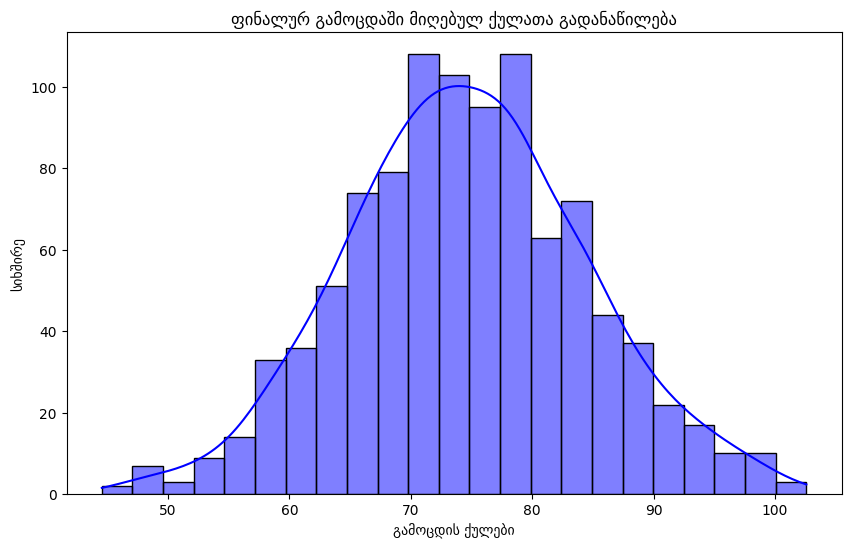

 საშუალო: 74.54743292509804
 მედიანა: 74.41971965200372
 მოდა: 44.53856945200073
 დისპერსია: 97.52096659781323
 სტანდარტული გადახრა: 9.875270456945128
 ასიმეტია: 0.03385895323566018
 ექსესი: -0.04676632447832896


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# მონაცემების გენერირება
np.random.seed(0)
exam_scores = np.random.normal(75, 10, 1000)

# ცხრილად ქცევა
df = pd.DataFrame({'Exam Scores': exam_scores})

# ვიზუალიზება
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam Scores'], kde=True, color='blue')
plt.title('ფინალურ გამოცდაში მიღებულ ქულათა გადანაწილება')
plt.xlabel('გამოცდის ქულები')
plt.ylabel('სიხშირე')
plt.show()

# მახასიათებლები
mean = df['Exam Scores'].mean()
median = df['Exam Scores'].median()
mode = df['Exam Scores'].mode()[0]
variance = df['Exam Scores'].var()
std_dev = df['Exam Scores'].std()
skewness = skew(df['Exam Scores'])
kurt = kurtosis(df['Exam Scores'])


# დაბეჭდე შედეგები
print(f" საშუალო: {mean}")
print(f" მედიანა: {median}")
print(f" მოდა: {mode}")
print(f" დისპერსია: {variance}")
print(f" სტანდარტული გადახრა: {std_dev}")
print(f" ასიმეტია: {skewness}")
print(f" ექსესი: {kurt}")


## **სავარჯიშო 5:** დასაქმებულთა ხელფასის მოდელი (**3 ქულა**)

კომპანიას სურს შეაფასოს, დასაქმების ბაზარზე ხელფასზე რა გავლენას ახდენს გამოცდილება, განათლების დონე და თანამდებობა, რათა უზრუნველყოს სამართლიანი და კონკურენტული ანაზღაურება. მოცემულია დასაქმების ბაზრის მონაცემები employee_salaries.csv:

- განსაზღვრეთ წრფივი რეგრესიის ფორმულა.
- გაყავით მონაცემები საწვრთნელ და სატესტო ნაწილებად.
- გაწვრთენით წრფივი რეგრესიის მოდელი.
- სვეტოვანი დიაგრამით გამოსახეთ რეგრესიის კოეფიციენტები.
- გაფანტულობის დიაგრამით გამოსახეთ ნამდვილი და მოდელით ნაპროგნოზები ხელფასების ურთიერთმიმართება.
- გამოთვალეთ მოდელის საშუალო კვადრატული ცდომილების ფესვი (RMSE - Root Mean Squared Error), საშუალო აბსოლუტური შეცდომა (MAE - Mean Absolute Error) და $R^2$ (დეტერმინაციის კოეფიციენტი).
- გამოიტანეთ დასკვნა, რამდენად კარგი ჩანს მოდელი.


In [25]:
employee_data = pd.read_csv('data/employee_salaries.csv')

employee_data.head()

,experience,education,job_position,salary
0,7.123591,0,Junior,12130.807823
1,5.215617,0,Senior,13975.692769
2,4.798317,1,Junior,12589.845042
3,3.799687,0,Junior,9344.863186
4,3.412767,2,Senior,14794.335833


In [30]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# encoding კატეგორიული ცვლადისათვის
encoder = OneHotEncoder(drop='first')
encoded_positions = encoder.fit_transform(employee_data[['job_position']])
encoded_positions_df = pd.DataFrame(encoded_positions.toarray(), columns=encoder.get_feature_names_out(['job_position']))

# Concatenate encoded columns back to the original dataframe
employee_data_encoded = pd.concat([employee_data.drop('job_position', axis=1), encoded_positions_df], axis=1)

# განვსაღვროთ თვისებები და სამიზნე ველები
X = employee_data_encoded.drop('salary', axis=1)
y = employee_data_encoded['salary']

# განვსაზღვროთ სატესტო და სატრენინგო მონეაცმები
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# გავწრთნათ წრფივი რეგრესია
model = LinearRegression()
model.fit(X_train, y_train)

# პროგნოზირება სატესტო მონაცემებზე
y_pred = model.predict(X_test)

# დავთვალოთ მეტრიკები
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2


C:\Users\Space Cowboy\PycharmProjects\Data Science\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(1008.5223025663114, 810.8490362511724, 0.9118584938427918)

<Figure size 1000x600 with 0 Axes>

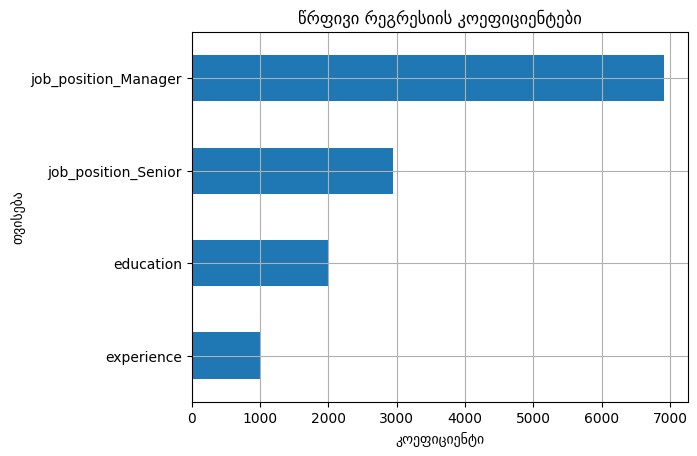

In [33]:
# მოდელის კოეფიციენტები და თვისებები
coefficients = model.coef_
features = X.columns

coeff_df = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])

# კოეფიციენტების დიაგრამა
plt.figure(figsize=(10, 6))
coeff_df.sort_values(by='Coefficient', ascending=True).plot(kind='barh', legend=None)
plt.title('წრფივი რეგრესიის კოეფიციენტები')
plt.xlabel('კოეფიციენტი')
plt.ylabel('თვისება')
plt.grid(True)
plt.show()


წრფივი რეგრესიის მოდელი ეფექტური აღოჩნდა მოცემულ შემთხვევაში, თანამშორბლების ხელფასების პროგნოზირებაზე მოცემული მახასიათებლების მიხედვით(გამოცდილება, განათლება, სამუშაო პოზიცია). 